In [1]:
from catboost import  CatBoostClassifier
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, NearMiss, NeighbourhoodCleaningRule, OneSidedSelection, TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import make_pipeline

import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'catboost'

In [19]:
data = pd.read_csv('../datasets/BankChurners_change.csv', encoding='CP949')
data = data.iloc[:,2:23]
np.random.seed(42)
random.seed(42)

In [20]:
object_columns = data.select_dtypes('object').columns

for i in object_columns:

    lb = LabelEncoder()
    lb.fit(data[i])
    data[i] = lb.transform(data[i])
    
    print(f'category : {np.unique(data[i])}\nclasses : {lb.classes_}\n')

input = data.iloc[:,1:]
target = data.iloc[:,0]

category : [0 1]
classes : ['Attrited Customer' 'Existing Customer']

category : [0 1]
classes : ['F' 'M']

category : [0 1 2 3 4 5 6]
classes : ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']

category : [0 1 2 3]
classes : ['Divorced' 'Married' 'Single' 'Unknown']

category : [0 1 2 3 4 5]
classes : ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']

category : [0 1 2 3]
classes : ['Blue' 'Gold' 'Platinum' 'Silver']

category : [0 1 2 3 4]
classes : ['20대' '30대' '40대' '50대' '60대 이상']



## Under Sampling

In [4]:
columns = ['f1_score', 'recall', 'precision', 'accuracy']
df = pd.DataFrame(columns=columns)

sampling = [EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, NearMiss,NeighbourhoodCleaningRule, OneSidedSelection,TomekLinks]

for i in sampling:
    
    x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

    ss = StandardScaler()
    x_train_ss = ss.fit_transform(x_train)
    x_test_ss = ss.fit_transform(x_test)

    if i == OneSidedSelection:
        sampling = i(random_state=42)
    else:
        sampling = i()

    x_train_ss, y_train = sampling.fit_resample(x_train_ss, y_train)

    cat = CatBoostClassifier(random_state=42, verbose=0)
    cat.fit(x_train_ss, y_train)
    pred = cat.predict(x_test_ss)

    acc = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    df.loc[i.__name__] = [f1, recall, precision, acc]

print("Cat Model's score by Under sampling")
df.sort_values(['f1_score', 'recall', 'precision', 'accuracy'], ascending=False)

Cat Model's score by Under sampling


,f1_score,recall,precision,accuracy
TomekLinks,0.983021,0.988228,0.977868,0.971372
OneSidedSelection,0.982415,0.986463,0.978400,0.970385
EditedNearestNeighbours,0.980798,0.977045,0.984579,0.967917
AllKNN,0.980764,0.975280,0.986310,0.967917
NeighbourhoodCleaningRule,0.980519,0.977634,0.983422,0.967423
RepeatedEditedNearestNeighbours,0.979241,0.971748,0.986850,0.965449
NearMiss,0.949786,0.912890,0.989789,0.919052


## Over Sampling

In [10]:
columns = ['f1_score', 'recall', 'precision', 'accuracy']
df = pd.DataFrame(columns=columns)

sampling = [SMOTE, BorderlineSMOTE, ADASYN]
strategy_ = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in sampling:
    
    for strategy in strategy_:
        x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

        ss = StandardScaler()
        x_train_ss = ss.fit_transform(x_train)
        x_test_ss = ss.fit_transform(x_test)

        sampling = i(sampling_strategy=strategy, random_state=42)
        x_train_ss, y_train = sampling.fit_resample(x_train_ss, y_train)

        cat = CatBoostClassifier(random_state=42, verbose=0)
        cat.fit(x_train_ss, y_train)
        pred = cat.predict(x_test_ss)

        acc = accuracy_score(y_test, pred)
        recall = recall_score(y_test, pred)
        precision = precision_score(y_test, pred)
        f1 = f1_score(y_test, pred)
        
        df.loc[i.__name__+'('+str(strategy)+')'] = [f1, recall, precision, acc]

print("Cat Model's score by Over sampling")
df.sort_values(['f1_score', 'recall', 'precision', 'accuracy'], ascending=False, inplace=True)
df.head(10)

Cat Model's score by Over sampling


,f1_score,recall,precision,accuracy
SMOTE(0.3),0.980172,0.974691,0.985714,0.966930
ADASYN(0.3),0.976509,0.966451,0.986779,0.961007
BorderlineSMOTE(0.3),0.973038,0.955856,0.990848,0.955577
SMOTE(0.4),0.964912,0.938788,0.992533,0.942744
ADASYN(0.4),0.963972,0.937022,0.992519,0.941264
BorderlineSMOTE(0.5),0.961363,0.929959,0.994962,0.937315
SMOTE(0.5),0.959805,0.927604,0.994322,0.934847
BorderlineSMOTE(0.4),0.955297,0.918187,0.995533,0.927937
SMOTE(0.6),0.950860,0.911124,0.994220,0.921027
ADASYN(0.5),0.950800,0.909947,0.995493,0.921027


In [11]:
columns = ['f1_score', 'recall', 'precision', 'accuracy']
df = pd.DataFrame(columns=columns)

sampling = [SMOTE, BorderlineSMOTE, ADASYN]

for i in sampling:

    x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

    ss = StandardScaler()
    x_train_ss = ss.fit_transform(x_train)
    x_test_ss = ss.fit_transform(x_test)

    sampling = i(random_state=42)
    x_train_ss, y_train = sampling.fit_resample(x_train_ss, y_train)

    cat = CatBoostClassifier(random_state=42, verbose=0)
    cat.fit(x_train_ss, y_train)
    pred = cat.predict(x_test_ss)

    acc = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    df.loc[i.__name__] = [f1, recall, precision, acc]

print("Cat Model's score by Over sampling")
df.sort_values(['f1_score', 'recall', 'precision', 'accuracy'], ascending=False, inplace=True)
df.head(10)

Cat Model's score by Over sampling


,f1_score,recall,precision,accuracy
BorderlineSMOTE,0.915924,0.846380,0.997918,0.869694
SMOTE,0.908275,0.833431,0.997886,0.858835
ADASYN,0.880921,0.788111,0.998509,0.821323


## Combine Sampling

In [12]:
columns = ['f1_score', 'recall', 'precision', 'accuracy']
df = pd.DataFrame(columns=columns)

sampling = [SMOTETomek, SMOTEENN]

for i in sampling:

    x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

    ss = StandardScaler()
    x_train_ss = ss.fit_transform(x_train)
    x_test_ss = ss.fit_transform(x_test)

    sampling = i(random_state=42)
    x_train_ss, y_train = sampling.fit_resample(x_train_ss, y_train)

    cat = CatBoostClassifier(random_state=42, verbose=0)
    cat.fit(x_train_ss, y_train)
    pred = cat.predict(x_test_ss)

    acc = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    df.loc[sampling] = [f1, recall, precision, acc]

print("Cat Model's score by Combine sampling")
df.sort_values(['f1_score', 'recall', 'precision', 'accuracy'], ascending=False)

Cat Model's score by Combine sampling


,f1_score,recall,precision,accuracy
SMOTEENN(random_state=42),0.933250,0.876398,0.997989,0.894867
SMOTETomek(random_state=42),0.913265,0.842849,0.996521,0.865745


## Pipeline을 통한 Combine Sampling

In [17]:
strategy_ = [0.3, 0.4, 0.5]
columns = ['f1_score', 'recall', 'precision', 'accuracy']

df = pd.DataFrame(columns=columns)

under_sampling = [EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, NearMiss,NeighbourhoodCleaningRule, OneSidedSelection,TomekLinks]
over_sampling = [SMOTE, BorderlineSMOTE, ADASYN]

cat = CatBoostClassifier(random_state=42, verbose=0)

for over in over_sampling:

    for under in under_sampling:

        x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

        for strategy in strategy_:
            
            if under == OneSidedSelection:
                under_ = under(random_state=42)
            else:
                under_ = under()

            over_ = over(sampling_strategy=strategy, random_state=42)

            ss = StandardScaler()
            x_train_ss = ss.fit_transform(x_train)
            x_test_ss = ss.fit_transform(x_test)

            model = make_pipeline(over_, under_, cat)   
            model.fit(x_train_ss, y_train)
            pred = model.predict(x_test_ss)

            acc = accuracy_score(y_test, pred)
            recall = recall_score(y_test, pred)
            precision = precision_score(y_test, pred)
            f1 = f1_score(y_test, pred)

            df.loc[over.__name__+under.__name__+'('+str(strategy)+')'] = [f1, recall, precision, acc]

print("Cat Model's score by sampling")
df.sort_values(['f1_score', 'recall', 'precision', 'accuracy'], ascending=False, inplace=True)
df.head(10)

Cat Model's score by sampling


,f1_score,recall,precision,accuracy
SMOTETomekLinks(0.3),0.979882,0.974691,0.985128,0.966436
SMOTEOneSidedSelection(0.3),0.979302,0.974691,0.983957,0.965449
SMOTENeighbourhoodCleaningRule(0.3),0.977077,0.965862,0.988554,0.961994
ADASYNTomekLinks(0.3),0.975000,0.964097,0.986153,0.958539
SMOTEEditedNearestNeighbours(0.3),0.974940,0.961742,0.988506,0.958539
SMOTEAllKNN(0.3),0.974910,0.960565,0.989691,0.958539
ADASYNOneSidedSelection(0.3),0.974099,0.962919,0.985542,0.957058
ADASYNNeighbourhoodCleaningRule(0.3),0.972746,0.955856,0.990244,0.955084
BorderlineSMOTEEditedNearestNeighbours(0.3),0.970810,0.949382,0.993227,0.952122
BorderlineSMOTETomekLinks(0.3),0.970226,0.949382,0.992005,0.951135


## Under, Over, Combine Sampling과 Pipeline을 통한 Combine Sampling 전체 결과

In [22]:
sampling = [EditedNearestNeighbours,RepeatedEditedNearestNeighbours, AllKNN, NearMiss,NeighbourhoodCleaningRule, OneSidedSelection,TomekLinks, SMOTE, BorderlineSMOTE, ADASYN, SMOTETomek, SMOTEENN]

for i in sampling:
    x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

    ss = StandardScaler()
    x_train_ss = ss.fit_transform(x_train)
    x_test_ss = ss.fit_transform(x_test)

    if i in [OneSidedSelection, SMOTE, BorderlineSMOTE, ADASYN, SMOTETomek, SMOTEENN]:
        sampling = i(random_state=42)
    else:
        sampling = i()
        
    x_train_ss, y_train = sampling.fit_resample(x_train_ss, y_train)

    cat = CatBoostClassifier(random_state=42, verbose=0)
    cat.fit(x_train_ss, y_train)
    pred = cat.predict(x_test_ss)

    acc = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    df.loc[i.__name__] = [f1, recall, precision, acc]

print("Cat Model's score by sampling")
df.sort_values(['f1_score', 'recall', 'precision', 'accuracy'], ascending=False, inplace=True)
df.head(10)

Cat Model's score by sampling


,f1_score,recall,precision,accuracy
TomekLinks,0.983021,0.988228,0.977868,0.971372
OneSidedSelection,0.982415,0.986463,0.978400,0.970385
EditedNearestNeighbours,0.980798,0.977045,0.984579,0.967917
AllKNN,0.980764,0.975280,0.986310,0.967917
NeighbourhoodCleaningRule,0.980519,0.977634,0.983422,0.967423
SMOTETomekLinks(0.3),0.979882,0.974691,0.985128,0.966436
SMOTEOneSidedSelection(0.3),0.979302,0.974691,0.983957,0.965449
RepeatedEditedNearestNeighbours,0.979241,0.971748,0.986850,0.965449
SMOTENeighbourhoodCleaningRule(0.3),0.977077,0.965862,0.988554,0.961994
ADASYNTomekLinks(0.3),0.975000,0.964097,0.986153,0.958539


## No Sampling

In [23]:
columns = ['f1_score', 'recall', 'precision', 'accuracy']
No_Sampling = pd.DataFrame(columns=columns)

random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

## CatBoost는 cat_features에 문자열 인덱스를 넣어주면 알아서 라벨링해주는 기능이 있다.
cat = CatBoostClassifier(iterations=100, random_state=42,verbose=0)
cat.fit(x_train, y_train) #, cat_features=object_col
pred = cat.predict(x_test)

acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test, pred)

No_Sampling.loc['No Sampling'] = [f1, recall, precision, acc]

print("Cat Model's score by sampling")
No_Sampling.sort_values(['f1_score', 'recall', 'precision', 'accuracy'], ascending=False, inplace=True)
No_Sampling.head(10)

Cat Model's score by sampling


,f1_score,recall,precision,accuracy
No Sampling,0.983309,0.988228,0.978438,0.971866


In [29]:
x_train, x_test, y_train, y_test = train_test_split(input, target, random_state=42, test_size=0.2)

ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)

cat = CatBoostClassifier(random_state=42, verbose=0)
cat.fit(x_train_ss, y_train)
pred = cat.predict(x_test_ss)

acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(f1)

0.9833187006145742


c:\프로그램\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CatBoost Feature Importance\n')

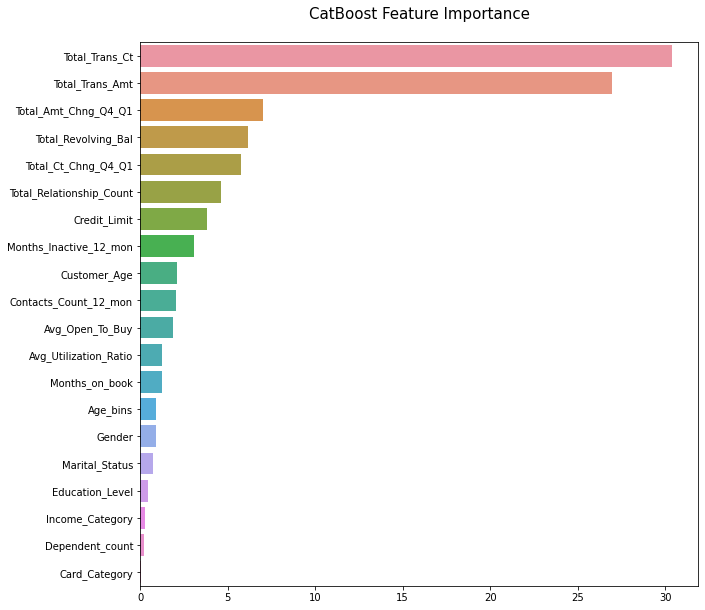

In [30]:
feature_importance = pd.Series(cat.feature_importances_, index=x_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10,10))
sns.barplot(feature_importance.values, feature_importance.index)
plt.title('CatBoost Feature Importance\n', fontsize=15)

In [39]:
columns = ['Attrited Customer', 'Existing Customer']
df = pd.DataFrame(columns=columns)

x_train, x_test, y_train, y_test = train_test_split(input, target, random_state=42, test_size=0.2)

ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)
df.loc['Before Sampling'] = [sum(y_train==0), sum(y_train==1)]

tl = TomekLinks()
x_train_ss, y_train = tl.fit_resample(x_train_ss, y_train)
df.loc['After Sampling'] = [sum(y_train==0), sum(y_train==1)]
print('TomekLinks Before After Data Compare')
df



TomekLinks Before After Data Compare


,Attrited Customer,Existing Customer
Before Sampling,1300,6801
After Sampling,1300,6662
